In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

In [7]:
#Graph for total water volume by phase
#group data by totals
#create summary tables of the plots 
#set parameters, will be added to function at later date
directory = r"H:\Cruickshank\ACO_20_3011\analysis\swe_tables"
parameter = "zbin"
wshed = "Cruickshank"
subbasin = "Cruickshank"
for_title = "Cruickshank"
file = subbasin + "_elevation.csv"
print(file)

out_directory = r"H:\Cruickshank\ACO_20_3011\analysis\graphs"

os.chdir(directory)
df = pd.read_csv(file)
print(df)


Cruickshank_elevation.csv
    zbin  water_volume      SWE_mm  phase
0    200  1.088613e+05   12.610597      1
1    300  8.086458e+05   78.044070      1
2    400  3.289238e+06  273.843624      1
3    500  4.993761e+06  421.698210      1
4    600  5.955421e+06  468.088558      1
..   ...           ...         ...    ...
90  1600  2.955987e+06  510.923704      5
91  1700  3.077198e+06  565.372953      5
92  1800  1.835685e+06  569.628591      5
93  1900  5.700586e+05  582.286662      5
94  2000  5.397346e+04  852.998219      5

[95 rows x 4 columns]


In [8]:
sum = df.groupby(
    ["phase"]).agg({  
    "water_volume": "sum",
}).round(2).reset_index()
display(sum)
#sum["Phase"]= sum["Phase"].astype(str)
#name = "summary_" + name
#sum.to_csv(name,index=True)

,phase,water_volume
0,1,1.421589e+08
1,2,1.509952e+08
2,3,9.862205e+07
3,4,5.724526e+07
4,5,2.133415e+07


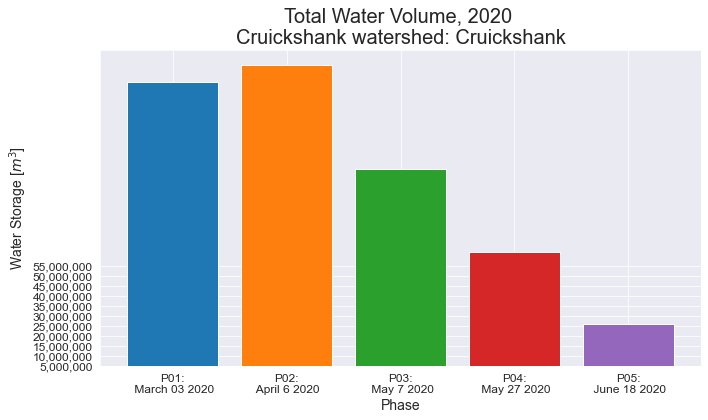

In [9]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
color_list = sns.color_palette()[:5]
plt.bar(sum["phase"], sum["water_volume"], color=color_list)

totalwatervol_title = "Total Water Volume, 2020 \n" + wshed + " watershed: " + for_title
totalwatervol_output = "Total Water Volume" + wshed + "_" + subbasin + ".png"

#set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax.set_title(totalwatervol_title, fontsize = 20)
# including upper limits



#ax.yaxis.set_ticks(np.arange(0, 1700, 200))

ax.set_ylabel("Water Storage [$m^{3}$]", fontsize=14)
ax.set_xlabel("Phase", fontsize=14)
labels2021 = ["P01:\n March 03 2020", "P02:\n April 6 2020", "P03:\n May 7 2020", "P04:\n May 27 2020", "P05:\n June 18 2020"]
plt.xticks(sum.phase, fontsize=12)
ax.set_xticklabels(labels2021)

#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False,))


#errorbars
#plt.vlines(sum["Phase"],sum["lower_wv"],sum["upper_wv"],color="black")
plt.yticks(np.arange(0, 55000000, step=5000000),fontsize=12)

labels = ["5,000,000", "10,000,000", "15,000,000", "20,000,000", "25,000,000", "30,000,000", "35,000,000", "40,000,000","45,000,000", "50,000,000","55,000,000"]
ax.set_yticklabels(labels)

os.chdir(out_directory)
plt.savefig(totalwatervol_output)
plt.show()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353)]


C:\Users\BISHOPA\AppData\Local\Temp\ipykernel_3680\1420830490.py:49: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([p1,p2,p3,p4,p5], labels=["P01: March 3 2020", "P02: April 6 2020", "P03: May 7 2020", "P04: May 27 2020", "P05: June 18 2020"], loc="upper left", fontsize = "medium")


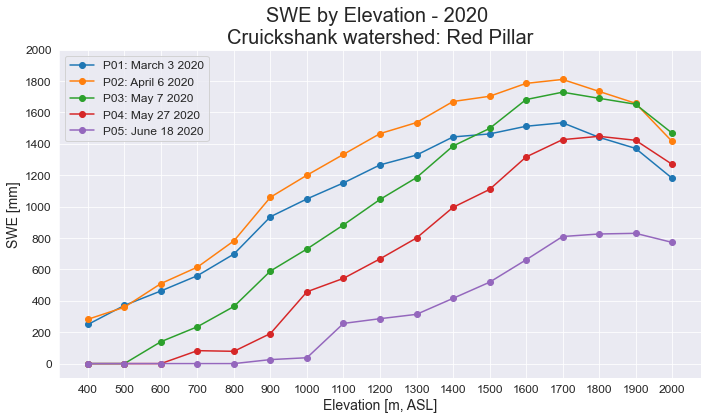

In [5]:
os.chdir(directory)
df = pd.read_csv(file)
elevation_swe_title = "SWE by Elevation - 2020 \n" + wshed + " watershed: " + for_title
elevation_swe_output = "SWE_Elevation_" + wshed + "_" + subbasin + ".png"

color_list = sns.color_palette()[:5]
print(color_list)


#set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
#plt.subplots_adjust(top=.9,bottom=-.9)

p01 = df[df["phase"]==1]
p02 = df[df["phase"]==2]
p03 = df[df["phase"]==3]
p04 = df[df["phase"]==4]
p05 = df[df["phase"]==5]

p1 = ax.plot(p01["zbin"], p01["SWE_mm"], "-o", color=color_list[0])
p2 = ax.plot(p02["zbin"], p02["SWE_mm"], "-o", color=color_list[1])
p3 = ax.plot(p03["zbin"], p03["SWE_mm"], "-o", color=color_list[2])
p4 = ax.plot(p04["zbin"], p04["SWE_mm"], "-o", color=color_list[3])
p5 = ax.plot(p05["zbin"], p05["SWE_mm"], "-o", color=color_list[4])



ax.set_xlabel('Elevation [m, ASL]')
tick_spacing = 100
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.yaxis.set_ticks(np.arange(0, 2200, 200))
ax.set_ylabel('SWE [mm]')
#ax.legend([p1,p2,p3,p4,p5], labels=["P01", "P02", "P03", "P04", "P05"], loc="upper left", fontsize = "medium")
ax.legend([p1,p2,p3,p4,p5], labels=["P01: March 3 2020", "P02: April 6 2020", "P03: May 7 2020", "P04: May 27 2020", "P05: June 18 2020"], loc="upper left", fontsize = "medium")
ax.set_title(elevation_swe_title, fontsize = 20)


os.chdir(out_directory)
plt.savefig(elevation_swe_output)
plt.show()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353)]


C:\Users\BISHOPA\AppData\Local\Temp\ipykernel_3680\1037346387.py:50: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend([p1,p2,p3,p4,p5], labels=["P01: March 3 2020", "P02: April 6 2020", "P03: May 7 2020", "P04: May 27 2020", "P05: June 18 2020"], loc="upper left", fontsize = "medium")


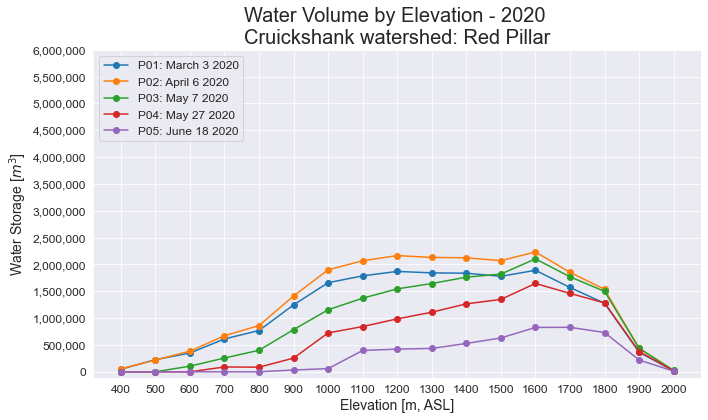

In [6]:
elevation_watervol_title = "Water Volume by Elevation - 2020 \n" + wshed + " watershed: " + for_title
elevation_watervol_output = "WaterVol_Elevation_" + wshed + "_" + subbasin + ".png"

os.chdir(directory)
df = pd.read_csv(file)

color_list = sns.color_palette()[:5]
print(color_list)


#set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(figsize=(10,6))
fig.set_tight_layout(True)
#plt.subplots_adjust(top=.9,bottom=-.9)

p01 = df[df["phase"]==1]
p02 = df[df["phase"]==2]
p03 = df[df["phase"]==3]
p04 = df[df["phase"]==4]
p05 = df[df["phase"]==5]

p1 = ax.plot(p01["zbin"], p01["water_volume"], "-o", color=color_list[0])
p2 = ax.plot(p02["zbin"], p02["water_volume"], "-o", color=color_list[1])
p3 = ax.plot(p03["zbin"], p03["water_volume"], "-o", color=color_list[2])
p4 = ax.plot(p04["zbin"], p04["water_volume"], "-o", color=color_list[3])
p5 = ax.plot(p05["zbin"], p05["water_volume"], "-o", color=color_list[4])



ax.set_xlabel('Elevation [m, ASL]')
tick_spacing = 100
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.yaxis.set_ticks(np.arange(0, 6500000, 500000))
ax.set_yticklabels(["0","500,000","1,000,000","1,500,000", "2,000,000", "2,500,000", "3,000,000", "3,500,000", "4,000,000","4,500,000","5,000,000","5,500,000","6,000,000"])
ax.set_ylabel('Water Storage [$m^{3}$]')
ax.legend([p1,p2,p3,p4,p5], labels=["P01: March 3 2020", "P02: April 6 2020", "P03: May 7 2020", "P04: May 27 2020", "P05: June 18 2020"], loc="upper left", fontsize = "medium")
ax.set_title(elevation_watervol_title, fontsize = 20)


os.chdir(out_directory)
plt.savefig(elevation_watervol_output)
plt.show()